In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot
import preprocessing as pre
#from preprocessing import mean_on_analyte_batch, 
import seaborn as sns
from itertools import combinations

import matplotlib.cm as cm


****************************************
RUNNING IN DEVELOP
****************************************


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

#cs = ["slide_21","slide_22","slide_ 26","slide_27","slide_31","slide_32","slide_36","slide_23","slide_28","slide_33","slide_37"]
studies = ["microarray_2018_03_21"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [3]:
cs = ["2018_03_21_slide_31",]
spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
data = a2.Data(spots_dj=spots_dj)#.outlier_filtering()

In [4]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Collection Type,Replica
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LF-0.05,0.0500,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),513.863166,1132.621738,0.408333,2018_03_21_slide_50,microarray_2018_03_21,57.0,14.0,quant1,0.0
2,LF-0.05,0.0500,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),362.647574,245.234317,0.491667,2018_03_21_slide_50,microarray_2018_03_21,57.0,13.0,quant1,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,LF-0.5,0.5000,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),238.700508,168.557049,0.541667,2018_03_21_slide_50,microarray_2018_03_21,57.0,9.0,quant1,0.0
7,LF-0.0001,0.0001,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),352.451777,373.308699,0.687500,2018_03_21_slide_50,microarray_2018_03_21,57.0,8.0,quant1,0.0
8,LF-0.001,1.0000,LF,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),256.827411,161.209989,0.625000,2018_03_21_slide_50,microarray_2018_03_21,57.0,7.0,quant1,0.0
9,P091,1.0000,P091,A/Panama/2007/1999(H3N2)-2018-04-13,A/Panama/2007/1999(H3N2),463.865524,379.883171,0.617188,2018_03_21_slide_50,microarray_2018_03_21,52.0,5.0,quant1,0.0


In [5]:
mean_on_anlyte_batch = data.mean_on_analyte_batch()
mean_spots_grouped = mean_on_anlyte_batch.groupby("Analyte Batch")
grouped_combinations = combinations(mean_spots_grouped,2)

In [6]:
peptide_c_signif = data.ligand_batch_significance()


In [7]:
len(list(grouped_combinations))

78

In [8]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].max()).sort_values(ascending=False)

Ligand Batch
P059         0.998766
P081         0.996884
P075         0.994463
P067         0.992725
P047         0.992311
P045.3       0.980648
P057         0.970106
P104         0.968411
P102         0.965788
LF-0.5       0.950968
LF-0.0001    0.948780
P050         0.945043
P098         0.941362
P101         0.940393
P009         0.936561
P066         0.925791
P013         0.922310
P133         0.922042
P115         0.921253
P130         0.910205
P043         0.904780
P056         0.892683
P118         0.891840
P068         0.889715
P054         0.889131
P119         0.876449
P060         0.870665
P122         0.865493
P099         0.852045
P123         0.848625
               ...   
P124         0.682852
P063         0.677233
LF-0.01      0.668388
P103         0.655501
P080         0.648522
P086         0.648500
P048         0.642468
P090         0.642235
P083         0.640425
P072         0.582783
P074         0.582381
P114         0.568863
P065         0.547947
P095         0.5288

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


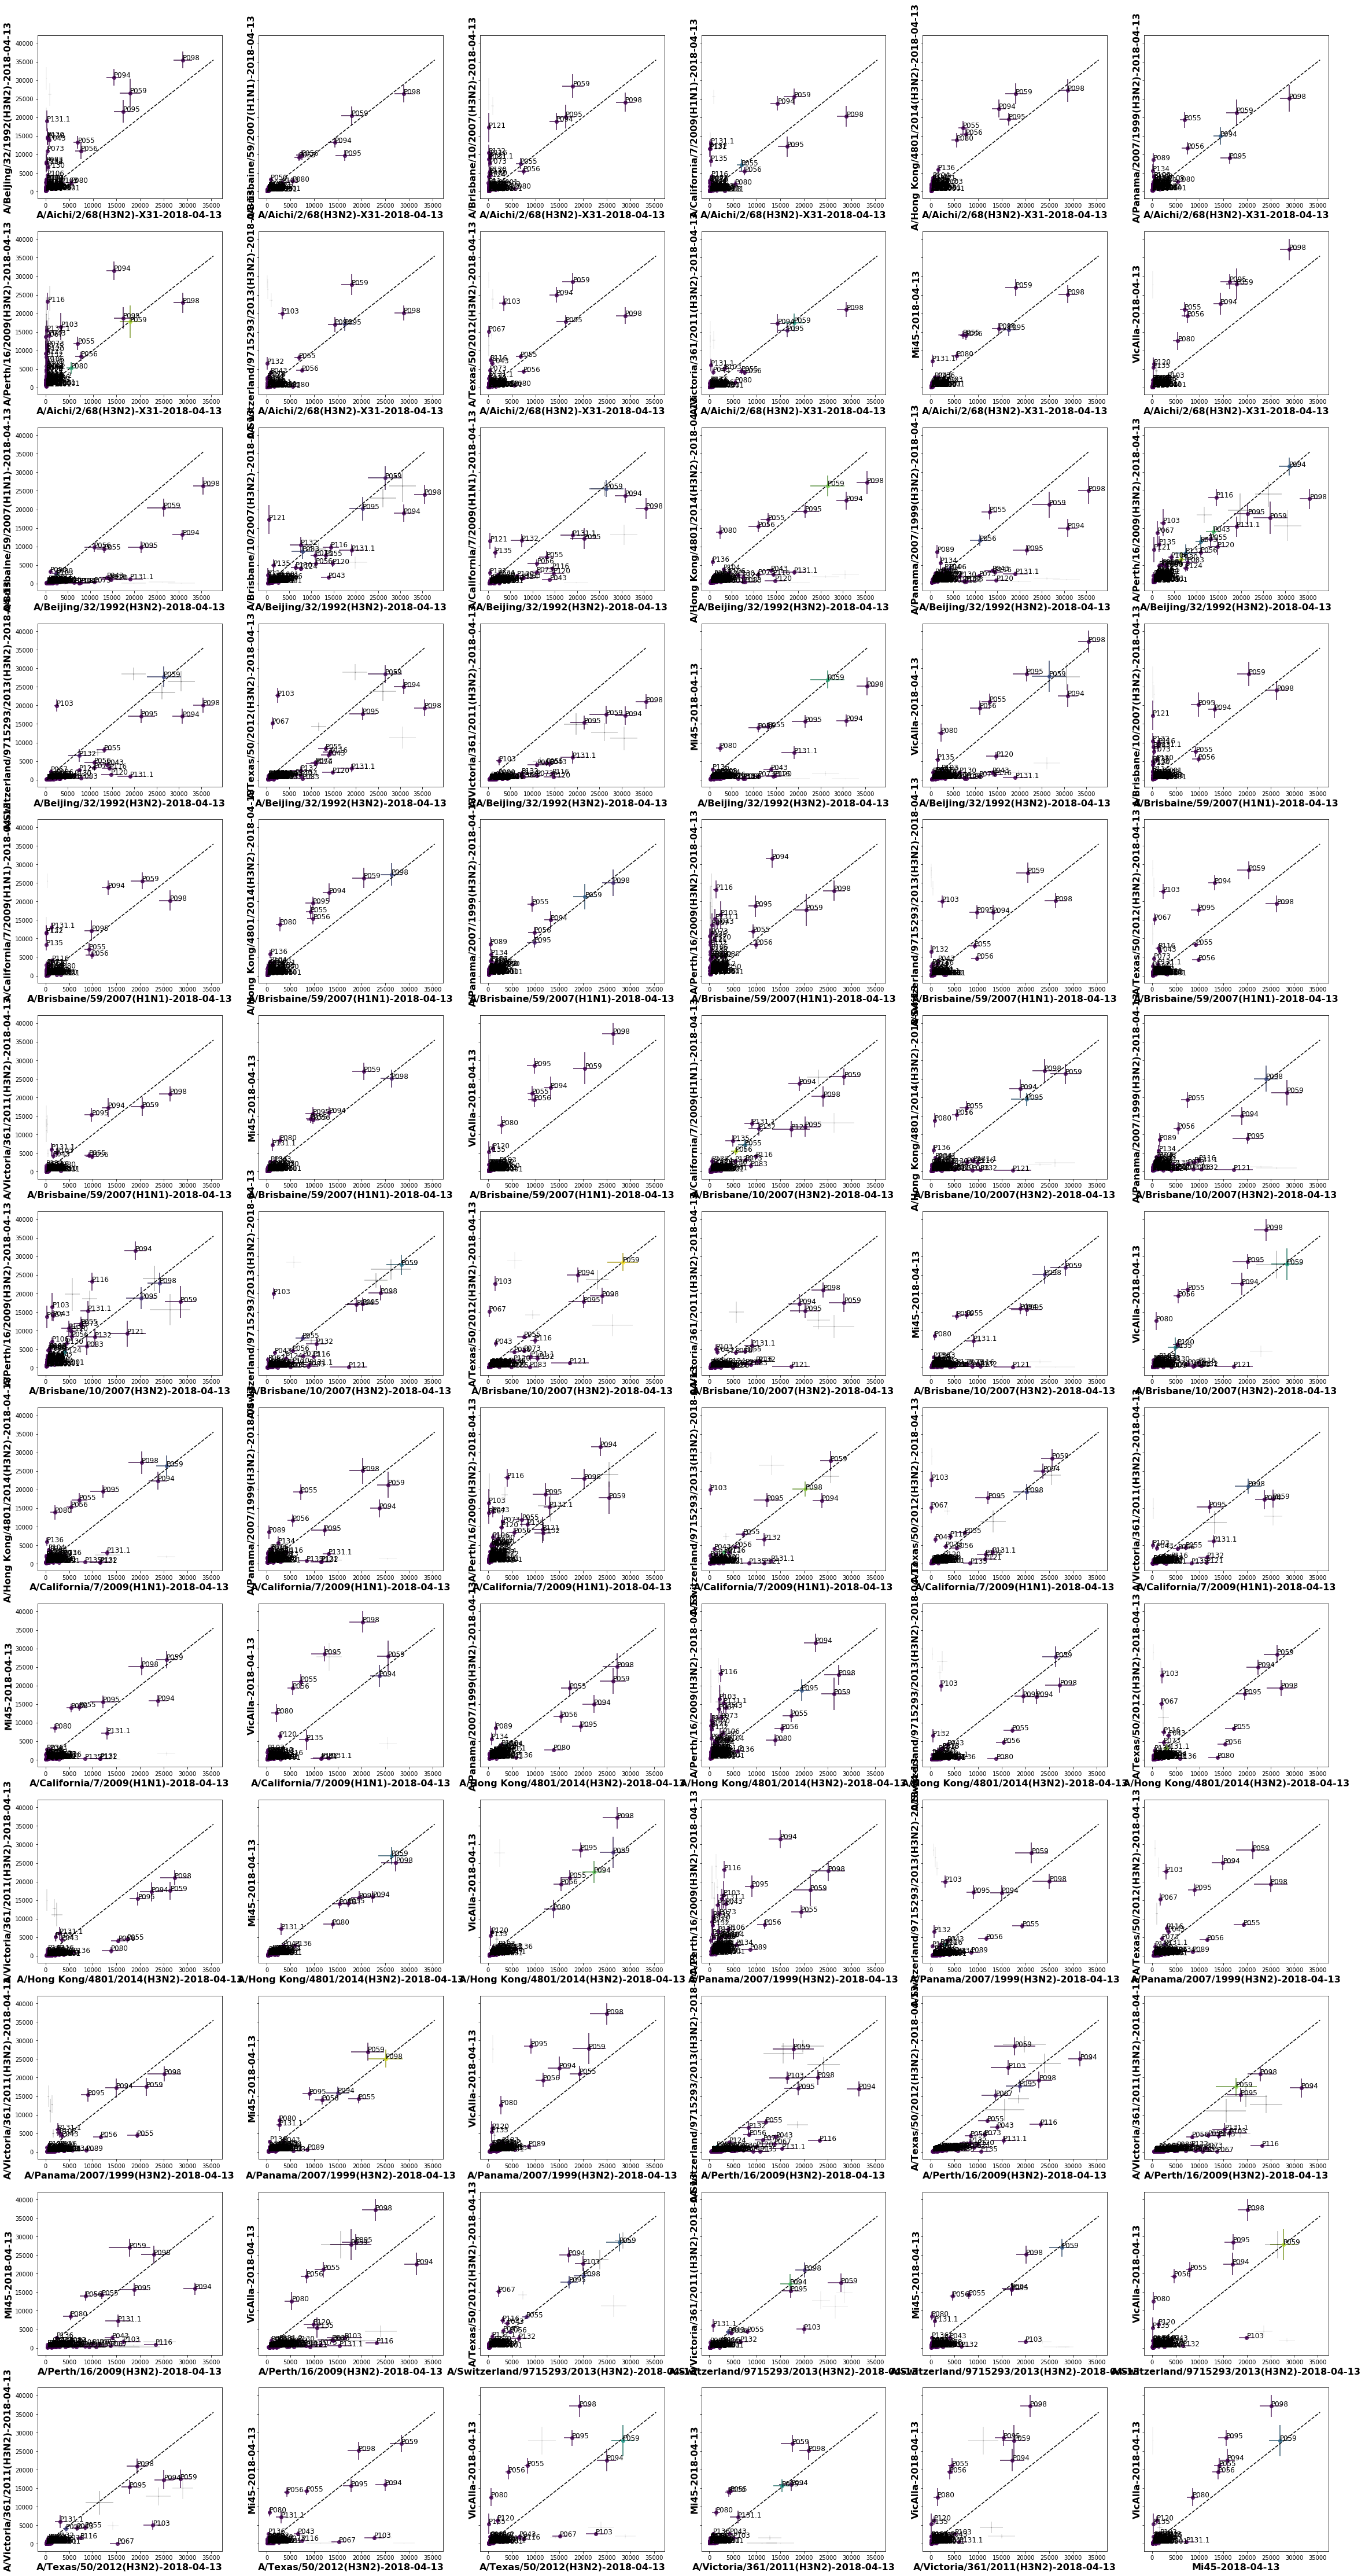

In [9]:
fig, axes = plt.subplots(ncols=6,nrows=13, figsize = (40,80), sharey=True)

ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.viridis
for name, d in peptide_c_signif.groupby("Analyte Batches"):
    x = y = np.linspace(peptide_c_signif.V1_I.min(),peptide_c_signif.V1_I.max())
    ax = next(ax_it)
    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    #ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    #ax.set_xlim(0,x.max())
    #ax.set_ylim(0,y.max())

    
    #ax.set_xscale("log")
    #ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.15
    #d_selected = d[d["Significance"] < boundary]
    #d_n = d[d["Significance"] > boundary]
    
    d_selected = d[~d["Ligand Batch"].isin(["P125","P084","Nenad","132","P102"])]
    d_n = d
    
    #d_selected = d.loc[d["Peptide"].isin(["Pep_80","Pep_43","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad","Pep_49","Pep_50"])]
    #d_selected = d.loc[d["Ligand Batch"].isin(["Nenad"])]
    #d_selected = d.loc[d["Peptide"].isin(["Pep_43","Pep_55","Pep_56","Pep_59","Pep_63","Pep_131.2"])]


    

    alphas = iter(np.linspace(0.3,0.05,len(d)))
    

    for ii, dp in d_selected.iterrows():
        #if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Ligand Batch"],(dp.V1_I+0.01,dp.V2_I+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")


#plt.savefig(directory+"all_correlations.png", bbox_inches="tight")    
plt.show()    

In [10]:
peptide_c_signif[peptide_c_signif["Ligand Batch"]=="P084"].sort_values(by="Significance")

,Ligand Batch,Analyte Batches,Significance,V1_I,V2_I,V1_Err,V2_Err,V1_Count,V2_Count
2079,P084,"(A/Brisbaine/59/2007(H1N1)-2018-04-13, A/Calif...",2.03673e-52,453.194,25528.1,51.0681,1921.02,27,27
294,P084,"(A/Aichi/2/68(H3N2)-X31-2018-04-13, A/Californ...",1.23706e-51,933.998,25528.1,347.322,1921.02,27,27
3694,P084,"(A/California/7/2009(H1N1)-2018-04-13, A/Panam...",2.2232e-51,25528.1,1376.72,1921.02,263.601,27,27
3609,P084,"(A/California/7/2009(H1N1)-2018-04-13, A/Hong ...",1.10229e-50,25528.1,1884.71,1921.02,380.537,27,27
2419,P084,"(A/Brisbaine/59/2007(H1N1)-2018-04-13, A/Switz...",1.14392e-50,453.194,23536.3,51.0681,1912.63,27,27
4119,P084,"(A/California/7/2009(H1N1)-2018-04-13, Mi45-20...",2.51314e-50,25528.1,1659.39,1921.02,588.061,27,27
634,P084,"(A/Aichi/2/68(H3N2)-X31-2018-04-13, A/Switzerl...",7.60281e-50,933.998,23536.3,347.322,1912.63,27,27
4969,P084,"(A/Panama/2007/1999(H3N2)-2018-04-13, A/Switze...",1.47824e-49,1376.72,23536.3,263.601,1912.63,27,27
4459,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Swi...",8.09863e-49,1884.71,23536.3,380.537,1912.63,27,27
5989,P084,"(A/Switzerland/9715293/2013(H3N2)-2018-04-13, ...",1.78183e-48,23536.3,1659.39,1912.63,588.061,27,27


In [11]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

Ligand Batch
LF-0.1       7.928725e-290
LF-0.05       2.767913e-95
P102          5.264433e-58
P084          2.036731e-52
P090          3.267612e-51
P103          3.449095e-51
Nenad         2.841424e-50
P063          2.299546e-49
P065          3.778447e-49
P116          4.351520e-48
P124          4.558772e-48
P101          1.619711e-47
P131.1        5.763991e-47
P125          1.870812e-46
P069          2.612138e-46
P047          4.823739e-46
P133          7.840433e-46
LF-0.5        8.324271e-46
P088          9.338281e-46
P067          1.095651e-45
P045.3        1.495047e-45
P104          2.437810e-45
P106          3.248155e-45
P091          3.555111e-45
P048          6.510716e-45
P072          9.795233e-45
P073          1.070417e-44
LF-0.001      4.351230e-44
P070          4.467886e-44
P128          4.934121e-44
                 ...      
P056          3.040684e-40
P055          4.060009e-40
P080          4.842417e-39
P136          1.355654e-38
P130          1.747076e-38
P121          5